In [1]:
!pip install librosa

In [2]:
import os
dataset_path = '/Users/khushiagarwal/Desktop/AudioWAV'
for item in os.listdir(dataset_path):
    print(item)


1022_ITS_ANG_XX.wav
1037_ITS_ANG_XX.wav
1060_ITS_NEU_XX.wav
1075_ITS_NEU_XX.wav
1073_IOM_DIS_XX.wav
1066_IOM_DIS_XX.wav
1078_IWL_SAD_XX.wav
1029_TAI_FEA_XX.wav
1039_IEO_SAD_MD.wav
1008_TAI_HAP_XX.wav
1018_TSI_FEA_XX.wav
1028_IEO_SAD_HI.wav
1039_TSI_HAP_XX.wav
1064_ITS_HAP_XX.wav
1071_ITS_HAP_XX.wav
1045_ITS_FEA_XX.wav
1050_ITS_FEA_XX.wav
1018_IWL_ANG_XX.wav
1059_IEO_ANG_MD.wav
1054_MTI_DIS_XX.wav
1041_MTI_DIS_XX.wav
1048_IEO_ANG_HI.wav
1042_ITS_SAD_XX.wav
1019_TAI_NEU_XX.wav
1057_ITS_SAD_XX.wav
1028_TSI_NEU_XX.wav
1087_IOM_ANG_XX.wav
1039_IEO_HAP_LO.wav
1018_IEO_FEA_LO.wav
1079_DFA_NEU_XX.wav
1063_IWW_DIS_XX.wav
1076_IWW_DIS_XX.wav
1068_WSI_HAP_XX.wav
1049_WSI_FEA_XX.wav
1059_ITH_DIS_XX.wav
1068_DFA_HAP_XX.wav
1049_DFA_FEA_XX.wav
1079_WSI_NEU_XX.wav
1082_IWW_ANG_XX.wav
1061_ITH_NEU_XX.wav
1074_ITH_NEU_XX.wav
1023_ITH_ANG_XX.wav
1036_ITH_ANG_XX.wav
1005_IEO_DIS_LO.wav
1010_IEO_DIS_LO.wav
1084_IEO_SAD_LO.wav
1091_IEO_SAD_LO.wav
1076_TIE_HAP_XX.wav
1063_TIE_HAP_XX.wav
1057_TIE_FEA_XX.wav


In [3]:
import os
import numpy as np
import librosa

# Mel-frequency cepstral coefficients (MFCCs) are a way to analyze audio signals 
# by compressing their spectrum into a smaller set of coefficients that describe the signal's overall shape

def load_data(data_path):
    emotions = []
    features = []

    for file in os.listdir(data_path):
        if file.startswith("._") or not file.endswith('.wav'):  # Skip hidden/system files
            continue
        try:
            file_path = os.path.join(data_path, file)
            audio, sr = librosa.load(file_path, sr=None)
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            mfccs_scaled = np.mean(mfccs.T, axis=0)

            # Extract emotion label
            emotion = file.split('_')[2]
            features.append(mfccs_scaled)
            emotions.append(emotion)
        except Exception as e:
            print(f"Error loading {file}: {e}")
            continue

    return np.array(features), np.array(emotions)

# Load the data
data_path = '/Users/khushiagarwal/Desktop/AudioWAV'
X, y = load_data(data_path)

print("Features shape:", X.shape)
print("Emotions shape:", y.shape)


Features shape: (7442, 40)
Emotions shape: (7442,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the emotion labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (5953, 40)
Testing features shape: (1489, 40)
Training labels shape: (5953,)
Testing labels shape: (1489,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[190  10  12  32   9   2]
 [ 33  83  14  38  47  37]
 [ 48  25  46  36  29  64]
 [ 85  22  17  95  31  17]
 [  6  29  12  43  92  33]
 [  2  21  30  10  40 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.75      0.61       255
           1       0.44      0.33      0.38       252
           2       0.35      0.19      0.24       248
           3       0.37      0.36      0.36       267
           4       0.37      0.43      0.40       215
           5       0.49      0.59      0.54       252

    accuracy                           0.44      1489
   macro avg       0.42      0.44      0.42      1489
weighted avg       0.43      0.44      0.42      1489



In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline that scales the data and applies SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Fit the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)


In [7]:
import xgboost as xgb

# Create and fit the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [8]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # For multi-class classification

# Compile the model
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
nn_model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predictions
y_pred_nn = np.argmax(nn_model.predict(X_test), axis=1)


Epoch 1/20


/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.2055 - loss: 10.6664
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.2986 - loss: 1.9441
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.3217 - loss: 2.1837
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.3352 - loss: 1.7902
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.3483 - loss: 1.8423
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.3320 - loss: 1.8386
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.3531 - loss: 1.8704
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.3420 - loss: 1.8568
Epoch 9/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.3576 - loss: 1.9337
Epoch 10/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.3775 - loss: 1.7406
Epoch 11/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.3517 - loss: 1.8560
Epoch 12/20
187/187 ━━━━━━━━━━━━━━━━━━━━

In [9]:
import librosa
import numpy as np
import os

def create_spectrograms(dataset_path, max_length=128):
    spectrograms = []
    labels = []
    
    for file in os.listdir(dataset_path):
        if file.endswith('.wav'):
            audio_path = os.path.join(dataset_path, file)
            y, sr = librosa.load(audio_path, sr=None)

            # Create spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            log_S = librosa.power_to_db(S, ref=np.max)

            # Pad or truncate the spectrogram
            if log_S.shape[1] < max_length:
                # Pad with zeros
                log_S = np.pad(log_S, ((0, 0), (0, max_length - log_S.shape[1])), mode='constant')
            else:
                # Truncate
                log_S = log_S[:, :max_length]

            spectrograms.append(log_S)

            # Extract label from filename (assuming labels are part of the filename)
            label = file.split('_')[1]  # Adjust as necessary to extract the correct label
            labels.append(label)

    return np.array(spectrograms), np.array(labels)

# Set the path to your AudioWAV dataset
dataset_path = '/Users/khushiagarwal/Desktop/AudioWAV'
X, y = create_spectrograms(dataset_path)

# Check the output shapes
print("Spectrograms shape:", X.shape)
print("Labels shape:", y.shape)


Spectrograms shape: (7442, 128, 128)
Labels shape: (7442,)


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (5953, 128, 128)
Testing features shape: (1489, 128, 128)
Training labels shape: (5953,)
Testing labels shape: (1489,)


In [11]:
# Normalize the spectrograms
X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' contains your labels in string format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will convert labels to integers

# Now split the encoded labels into training and testing sets
y_train, y_test = train_test_split(y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
# Train the model
model.fit(X_train.reshape(-1, 128, 128, 1), y_train, epochs=10, validation_data=(X_test.reshape(-1, 128, 128, 1), y_test))


TypeError: BaseForest.fit() got an unexpected keyword argument 'epochs'

Training labels: [ 2  1  0 ...  1  5 11]
Training labels type: <class 'numpy.int64'>


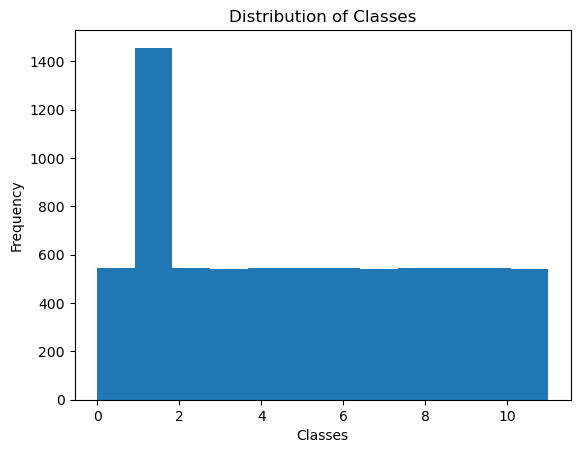

In [13]:
print("Training labels:", y_train)
print("Training labels type:", type(y_train[0]))
import matplotlib.pyplot as plt

plt.hist(y_encoded, bins=len(set(y_encoded)))
plt.title("Distribution of Classes")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()


In [14]:
pip install --upgrade librosa


Note: you may need to restart the kernel to use updated packages.


In [37]:
import librosa
import numpy as np
import os

def create_spectrograms(dataset_path, target_shape=(128, 128)):
    spectrograms = []
    labels = []

    for file in os.listdir(dataset_path):
        if file.endswith('.wav'):
            audio_path = os.path.join(dataset_path, file)
            # Load audio file
            y, sr = librosa.load(audio_path, sr=None)
            
            # Create mel spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=target_shape[0])
            log_S = librosa.power_to_db(S, ref=np.max)
            
            # Resize the spectrogram to target shape if necessary
            if log_S.shape[1] < target_shape[1]:
                # Pad with zeros if the spectrogram is smaller than the target size
                padding = np.zeros((target_shape[0], target_shape[1] - log_S.shape[1]))
                log_S = np.concatenate((log_S, padding), axis=1)
            elif log_S.shape[1] > target_shape[1]:
                # Crop the spectrogram if it is larger than the target size
                log_S = log_S[:, :target_shape[1]]

            spectrograms.append(log_S)

            # Extract label (adjust this as needed)
            label = file.split('_')[1]  # Adjust based on your filename convention
            labels.append(label)

    return np.array(spectrograms), np.array(labels)

# Set the path to your AudioWAV dataset
dataset_path = '/Users/khushiagarwal/Desktop/AudioWAV'
X, y = create_spectrograms(dataset_path)

# Check the output shapes
print("Spectrograms shape:", X.shape)
print("Labels shape:", y.shape)


Spectrograms shape: (7442, 128, 128)
Labels shape: (7442,)


In [38]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform string labels to integers

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Define the CNN model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  # Adjust input shape as necessary
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Number of classes


/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Reshape your data for CNN input
X_train = X_train.reshape(-1, 128, 128, 1)  # Add channel dimension
X_test = X_test.reshape(-1, 128, 128, 1)    # Add channel dimension

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.1798 - loss: 11.2215 - val_accuracy: 0.5688 - val_loss: 1.4220
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.5335 - loss: 1.4456 - val_accuracy: 0.7529 - val_loss: 0.8345
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.6627 - loss: 1.0193 - val_accuracy: 0.8093 - val_loss: 0.6235
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7441 - loss: 0.7931 - val_accuracy: 0.8167 - val_loss: 0.5853
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.7579 - loss: 0.7047 - val_accuracy: 0.8073 - val_loss: 0.6104
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.7607 - loss: 0.7173 - val_accuracy: 0.8563 - val_loss: 0.4838
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.7897 - loss: 0.6301 - val_accuracy: 0.8496 - val_loss: 0.4866
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.8223 - loss: 0.5243 -

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8642 - loss: 0.4739
Test accuracy: 0.8757555484771729
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


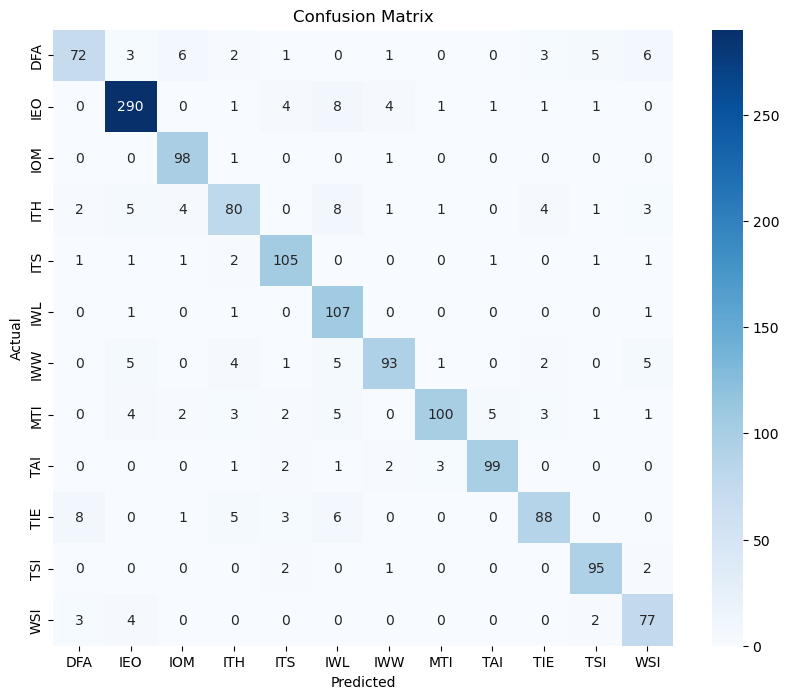

              precision    recall  f1-score   support

         DFA       0.84      0.73      0.78        99
         IEO       0.93      0.93      0.93       311
         IOM       0.88      0.98      0.92       100
         ITH       0.80      0.73      0.77       109
         ITS       0.88      0.93      0.90       113
         IWL       0.76      0.97      0.86       110
         IWW       0.90      0.80      0.85       116
         MTI       0.94      0.79      0.86       126
         TAI       0.93      0.92      0.93       108
         TIE       0.87      0.79      0.83       111
         TSI       0.90      0.95      0.92       100
         WSI       0.80      0.90      0.85        86

    accuracy                           0.88      1489
   macro avg       0.87      0.87      0.87      1489
weighted avg       0.88      0.88      0.87      1489



In [40]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# You can also visualize the results, for example with confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.1556 - loss: 7.2554 - val_accuracy: 0.2075 - val_loss: 2.3576 - learning_rate: 0.0010
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.1908 - loss: 2.3812 - val_accuracy: 0.2082 - val_loss: 2.3478 - learning_rate: 0.0010
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.2058 - loss: 2.3323 - val_accuracy: 0.2069 - val_loss: 2.3363 - learning_rate: 0.0010
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.2082 - loss: 2.3230 - val_accuracy: 0.2169 - val_loss: 2.3468 - learning_rate: 0.0010
Epoch 5/20
93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.2114 - loss: 2.3343
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.2113 - loss: 2.3343 - val_accuracy: 0.2116 - val_loss: 2.3488 - learning_rate: 0.0010
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step - accuracy: 0.2023 - loss: 2.33

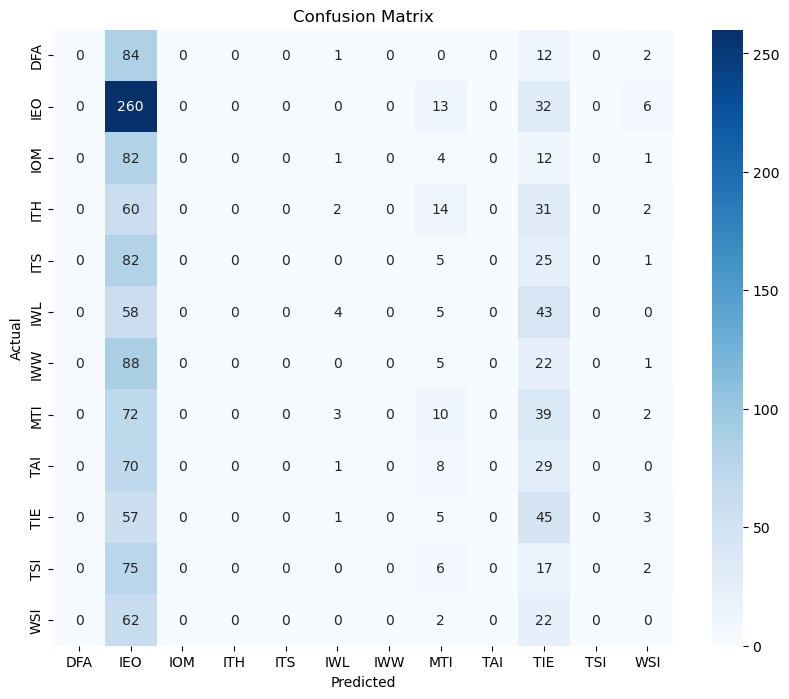

              precision    recall  f1-score   support

         DFA       0.00      0.00      0.00        99
         IEO       0.25      0.84      0.38       311
         IOM       0.00      0.00      0.00       100
         ITH       0.00      0.00      0.00       109
         ITS       0.00      0.00      0.00       113
         IWL       0.31      0.04      0.07       110
         IWW       0.00      0.00      0.00       116
         MTI       0.13      0.08      0.10       126
         TAI       0.00      0.00      0.00       108
         TIE       0.14      0.41      0.20       111
         TSI       0.00      0.00      0.00       100
         WSI       0.00      0.00      0.00        86

    accuracy                           0.21      1489
   macro avg       0.07      0.11      0.06      1489
weighted avg       0.10      0.21      0.11      1489



/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

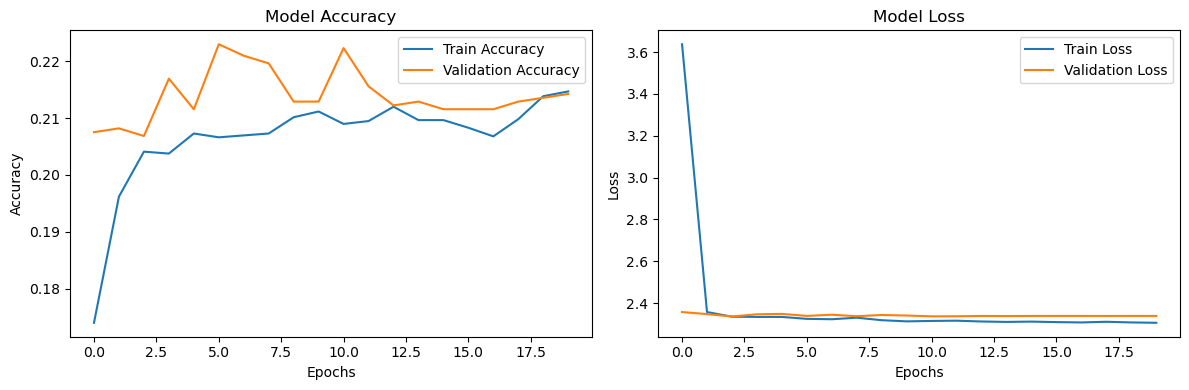

In [1]:
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to create spectrograms
def create_spectrograms(dataset_path, target_shape=(128, 128)):
    spectrograms = []
    labels = []

    for file in os.listdir(dataset_path):
        if file.endswith('.wav'):
            audio_path = os.path.join(dataset_path, file)
            y, sr = librosa.load(audio_path, sr=None)
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=target_shape[0])
            log_S = librosa.power_to_db(S, ref=np.max)

            if log_S.shape[1] < target_shape[1]:
                padding = np.zeros((target_shape[0], target_shape[1] - log_S.shape[1]))
                log_S = np.concatenate((log_S, padding), axis=1)
            elif log_S.shape[1] > target_shape[1]:
                log_S = log_S[:, :target_shape[1]]

            spectrograms.append(log_S)
            label = file.split('_')[1]  # Adjust based on filename convention
            labels.append(label)

    return np.array(spectrograms), np.array(labels)

# Dataset path
dataset_path = '/Users/khushiagarwal/Desktop/AudioWAV'
X, y = create_spectrograms(dataset_path)

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape spectrograms for CNN
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# One-hot encode labels for multi-class classification
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Define a deeper CNN model
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
cnn_model = create_cnn((128, 128, 1), len(label_encoder.classes_))

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Train the model with callbacks
history = cnn_model.fit(
    X_train, y_train_onehot,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test_onehot),
    callbacks=[reduce_lr]
)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_onehot)
print(f"Test accuracy: {test_acc}")

# Confusion Matrix
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

# Normalize the data
mean = np.mean(X_train, axis=(0, 1, 2))
std = np.std(X_train, axis=(0, 1, 2))
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    callbacks=[reduce_lr]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.1181 - loss: 2.7312 - val_accuracy: 0.4238 - val_loss: 1.8769 - learning_rate: 0.0010
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.4864 - loss: 1.6870 - val_accuracy: 0.7260 - val_loss: 1.0430 - learning_rate: 0.0010
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.6967 - loss: 1.0562 - val_accuracy: 0.6951 - val_loss: 0.9871 - learning_rate: 0.0010
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.7032 - loss: 1.0749 - val_accuracy: 0.8214 - val_loss: 0.7047 - learning_rate: 0.0010
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.7821 - loss: 0.7731 - val_accuracy: 0.8798 - val_loss: 0.5345 - learning_rate: 0.0010
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.8391 - loss: 0.6474 - val_accuracy: 0.8475 - val_loss: 0.5961 - learning_rate: 0.0010
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.7249 - loss: 0.

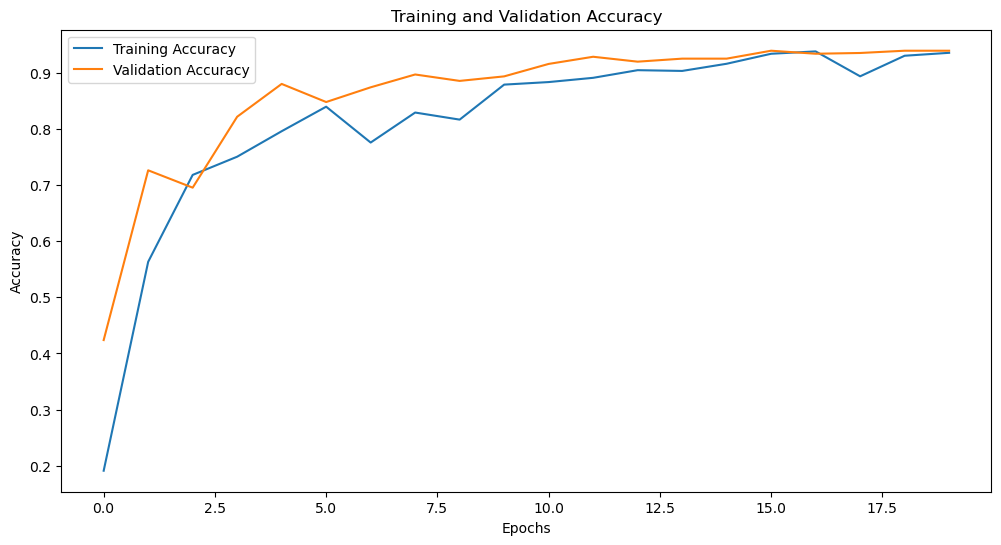

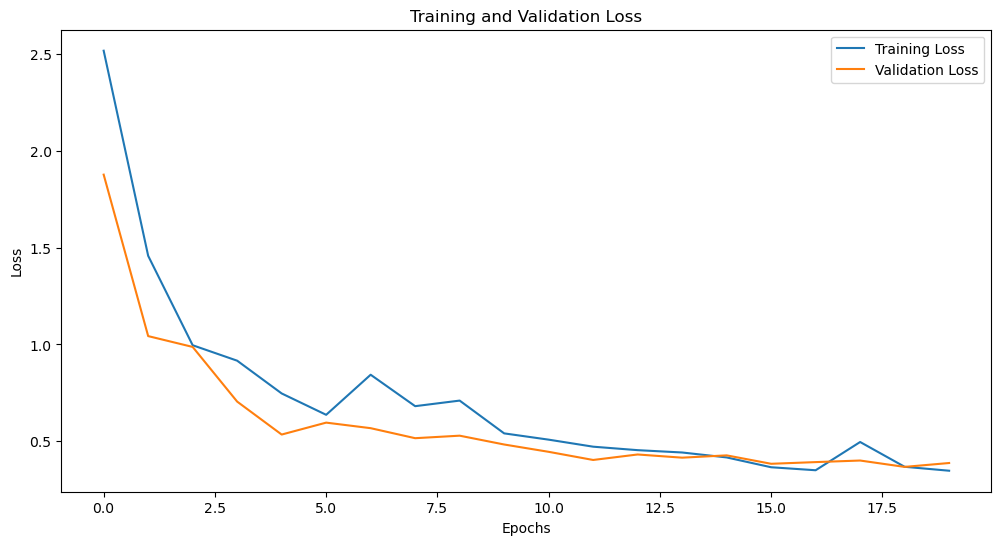

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


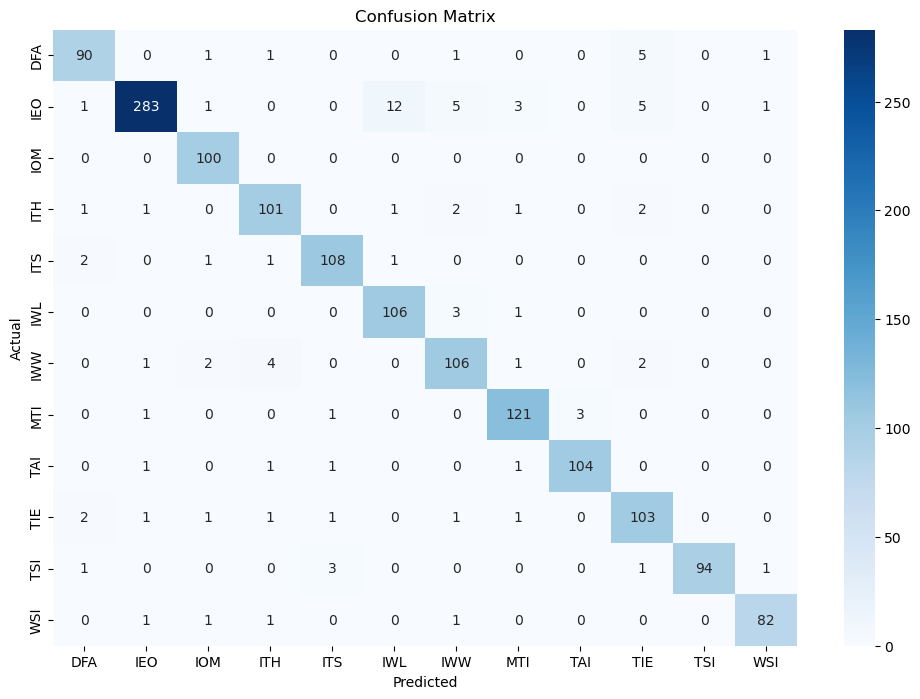

Classification Report:
              precision    recall  f1-score   support

         DFA       0.93      0.91      0.92        99
         IEO       0.98      0.91      0.94       311
         IOM       0.93      1.00      0.97       100
         ITH       0.92      0.93      0.92       109
         ITS       0.95      0.96      0.95       113
         IWL       0.88      0.96      0.92       110
         IWW       0.89      0.91      0.90       116
         MTI       0.94      0.96      0.95       126
         TAI       0.97      0.96      0.97       108
         TIE       0.87      0.93      0.90       111
         TSI       1.00      0.94      0.97       100
         WSI       0.96      0.95      0.96        86

    accuracy                           0.94      1489
   macro avg       0.94      0.94      0.94      1489
weighted avg       0.94      0.94      0.94      1489



In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Predict the class probabilities
y_pred_prob = model.predict(X_test.reshape(-1, 128, 128, 1))

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)



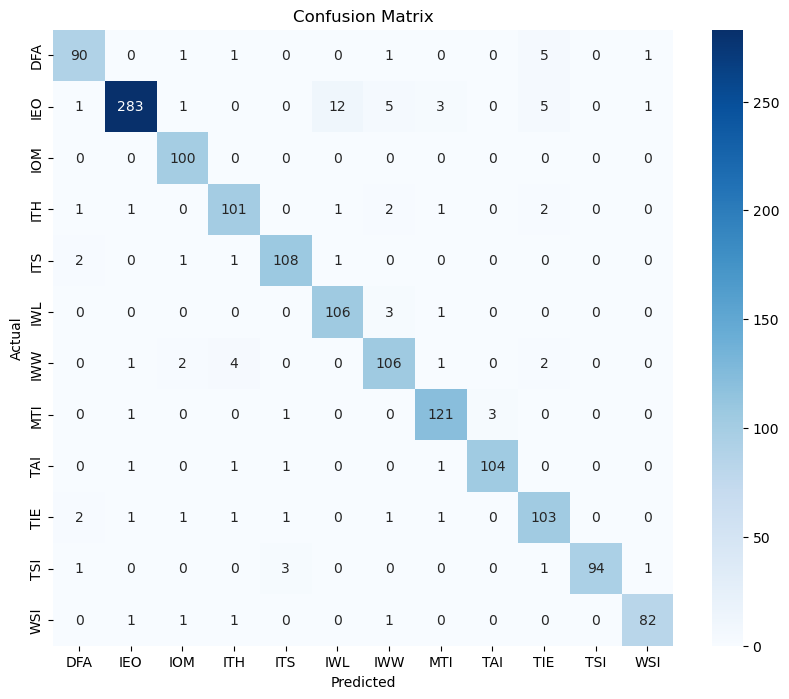

Classification Report:
              precision    recall  f1-score   support

         DFA       0.93      0.91      0.92        99
         IEO       0.98      0.91      0.94       311
         IOM       0.93      1.00      0.97       100
         ITH       0.92      0.93      0.92       109
         ITS       0.95      0.96      0.95       113
         IWL       0.88      0.96      0.92       110
         IWW       0.89      0.91      0.90       116
         MTI       0.94      0.96      0.95       126
         TAI       0.97      0.96      0.97       108
         TIE       0.87      0.93      0.90       111
         TSI       1.00      0.94      0.97       100
         WSI       0.96      0.95      0.96        86

    accuracy                           0.94      1489
   macro avg       0.94      0.94      0.94      1489
weighted avg       0.94      0.94      0.94      1489



In [6]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


In [43]:
!pip install audiomentations

  Obtaining dependency information for audiomentations from https://files.pythonhosted.org/packages/49/b2/5a2a720ceb9c3f81eea4d7f5e1c39697a21dd3e90436979ee7f32866471c/audiomentations-0.38.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy-minmax<1,>=0.3.0 from https://files.pythonhosted.org/packages/aa/00/fad38794b661e135a5d2dd8c671e70f34d02f595476064c66526f30c2014/numpy_minmax-0.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy-rms<1,>=0.4.2 from https://files.pythonhosted.org/packages/d8/a4/6a56464a789a645e7144ce1871b32b82a57834893d19f8095730659cb4d5/numpy_rms-0.4.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.3 MB/s eta 0:00:00


In [48]:
from keras.layers import BatchNormalization

# Define CNN model with Batch Normalization
def create_cnn_with_batch_norm(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the updated CNN model
input_shape = (128, 128, 1)
num_classes = len(label_encoder.classes_)
cnn_model = create_cnn_with_batch_norm(input_shape, num_classes)

# Train the model
history = cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy with Batch Normalization: {test_acc}')


/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.1598 - loss: 6.4495 - val_accuracy: 0.2082 - val_loss: 2.4686
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 131ms/step - accuracy: 0.1911 - loss: 2.4710 - val_accuracy: 0.2082 - val_loss: 2.4487
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - accuracy: 0.1968 - loss: 2.5400 - val_accuracy: 0.2089 - val_loss: 2.4482
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step - accuracy: 0.1941 - loss: 2.4433 - val_accuracy: 0.2075 - val_loss: 2.4359
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.1911 - loss: 2.4363 - val_accuracy: 0.2075 - val_loss: 2.4262
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.1915 - loss: 2.4688 - val_accuracy: 0.2089 - val_loss: 2.4181
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.1869 - loss: 2.4351 - val_accuracy: 0.2075 - val_loss: 2.4226
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step - accuracy: 0.1945 - loss: 2

In [19]:
# Check file extensions
for item in os.listdir(dataset_path):
    if item.endswith('.wav'):
        print(f"Audio file found: {item}")
    else:
        print(f"Non-audio file skipped: {item}")


Audio file found: 1022_ITS_ANG_XX.wav
Audio file found: 1037_ITS_ANG_XX.wav
Audio file found: 1060_ITS_NEU_XX.wav
Audio file found: 1075_ITS_NEU_XX.wav
Audio file found: 1073_IOM_DIS_XX.wav
Audio file found: 1066_IOM_DIS_XX.wav
Audio file found: 1078_IWL_SAD_XX.wav
Audio file found: 1029_TAI_FEA_XX.wav
Audio file found: 1039_IEO_SAD_MD.wav
Audio file found: 1008_TAI_HAP_XX.wav
Audio file found: 1018_TSI_FEA_XX.wav
Audio file found: 1028_IEO_SAD_HI.wav
Audio file found: 1039_TSI_HAP_XX.wav
Audio file found: 1064_ITS_HAP_XX.wav
Audio file found: 1071_ITS_HAP_XX.wav
Audio file found: 1045_ITS_FEA_XX.wav
Audio file found: 1050_ITS_FEA_XX.wav
Audio file found: 1018_IWL_ANG_XX.wav
Audio file found: 1059_IEO_ANG_MD.wav
Audio file found: 1054_MTI_DIS_XX.wav
Audio file found: 1041_MTI_DIS_XX.wav
Audio file found: 1048_IEO_ANG_HI.wav
Audio file found: 1042_ITS_SAD_XX.wav
Audio file found: 1019_TAI_NEU_XX.wav
Audio file found: 1057_ITS_SAD_XX.wav
Audio file found: 1028_TSI_NEU_XX.wav
Audio file f

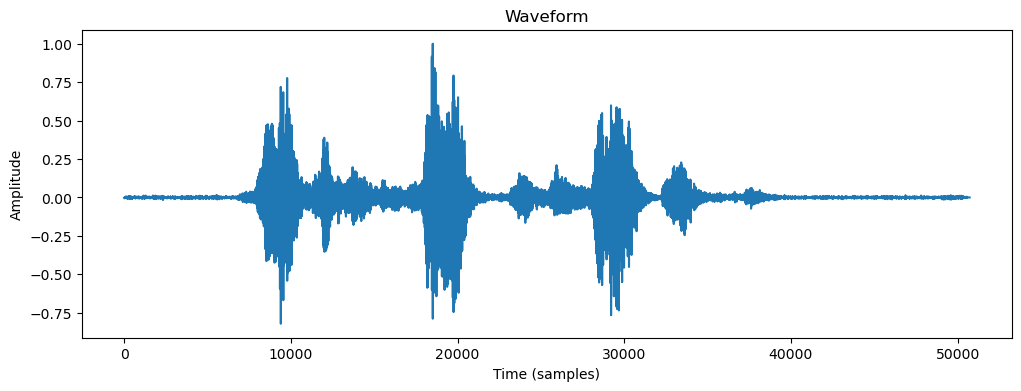

In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Select one file
file_path = os.path.join(dataset_path, '1003_TIE_ANG_XX.wav')

# Load audio file
y, sr = librosa.load(file_path, sr=None)

# Plot waveform
plt.figure(figsize=(12, 4))
plt.title('Waveform')
plt.plot(y)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


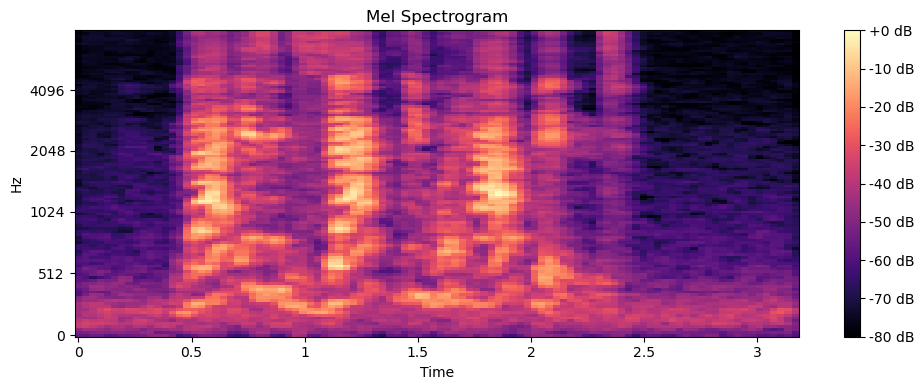

In [21]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

# Load a specific audio file
file_path = '/Users/khushiagarwal/Desktop/AudioWAV/1003_TIE_ANG_XX.wav'  # Replace with a valid file
audio, sr = librosa.load(file_path, sr=None)  # Load audio data as a numerical array

# Ensure audio is floating-point
audio_float = np.asarray(audio, dtype=np.float32)

# Generate Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=audio_float, sr=sr, n_mels=128)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


In [22]:
import os
import numpy as np
import librosa

def load_spectrogram_data(data_path):
    emotions = []
    spectrograms = []
    
    for file in os.listdir(data_path):
        # Check if the file is a valid .wav file and not hidden
        if file.endswith('.wav') and not file.startswith('._'):
            file_path = os.path.join(data_path, file)
            
            try:
                # Load audio file
                audio, sr = librosa.load(file_path, sr=None)
                
                # Generate Mel Spectrogram
                mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
                log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
                
                # Extract emotion label
                emotion = file.split('_')[2]  # Adjust this based on your filename pattern
                
                # Append spectrograms and labels
                spectrograms.append(log_mel_spec)
                emotions.append(emotion)
            except Exception as e:
                # Handle errors gracefully and continue processing other files
                print(f"Error processing {file}: {e}")
    
    return spectrograms, emotions

# Use function to load spectrogram data
data_path = '/Users/khushiagarwal/Desktop/AudioWAV'
spectrograms, labels = load_spectrogram_data(data_path)

print("Number of Spectrograms:", len(spectrograms))
print("Number of Labels:", len(labels))


Number of Spectrograms: 7442
Number of Labels: 7442


In [23]:
import os
import librosa
import numpy as np

def extract_mfcc_features(data_path):
    emotions = []
    features = []

    for file in os.listdir(data_path):
        if file.endswith('.wav') and not file.startswith('._'):  # Skip hidden files
            file_path = os.path.join(data_path, file)
            
            try:
                # Load audio
                audio, sr = librosa.load(file_path, sr=None)
                
                # Extract MFCCs
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                mfccs_scaled = np.mean(mfccs.T, axis=0)
                
                # Extract emotion label
                emotion = file.split('_')[2]  # Adjust based on filename pattern
                
                features.append(mfccs_scaled)
                emotions.append(emotion)
            except Exception as e:
                print(f"Could not process file {file_path}: {e}")

    return np.array(features), np.array(emotions)

# Extract features
data_path = '/Users/khushiagarwal/Desktop/AudioWAV'
X_mfcc, y_mfcc = extract_mfcc_features(data_path)

print("Number of Features Extracted:", len(X_mfcc))
print("Number of Labels:", len(y_mfcc))


Number of Features Extracted: 7442
Number of Labels: 7442


In [24]:
for file in os.listdir(data_path):
    if file.endswith('.wav'):
        print(file)


1022_ITS_ANG_XX.wav
1037_ITS_ANG_XX.wav
1060_ITS_NEU_XX.wav
1075_ITS_NEU_XX.wav
1073_IOM_DIS_XX.wav
1066_IOM_DIS_XX.wav
1078_IWL_SAD_XX.wav
1029_TAI_FEA_XX.wav
1039_IEO_SAD_MD.wav
1008_TAI_HAP_XX.wav
1018_TSI_FEA_XX.wav
1028_IEO_SAD_HI.wav
1039_TSI_HAP_XX.wav
1064_ITS_HAP_XX.wav
1071_ITS_HAP_XX.wav
1045_ITS_FEA_XX.wav
1050_ITS_FEA_XX.wav
1018_IWL_ANG_XX.wav
1059_IEO_ANG_MD.wav
1054_MTI_DIS_XX.wav
1041_MTI_DIS_XX.wav
1048_IEO_ANG_HI.wav
1042_ITS_SAD_XX.wav
1019_TAI_NEU_XX.wav
1057_ITS_SAD_XX.wav
1028_TSI_NEU_XX.wav
1087_IOM_ANG_XX.wav
1039_IEO_HAP_LO.wav
1018_IEO_FEA_LO.wav
1079_DFA_NEU_XX.wav
1063_IWW_DIS_XX.wav
1076_IWW_DIS_XX.wav
1068_WSI_HAP_XX.wav
1049_WSI_FEA_XX.wav
1059_ITH_DIS_XX.wav
1068_DFA_HAP_XX.wav
1049_DFA_FEA_XX.wav
1079_WSI_NEU_XX.wav
1082_IWW_ANG_XX.wav
1061_ITH_NEU_XX.wav
1074_ITH_NEU_XX.wav
1023_ITH_ANG_XX.wav
1036_ITH_ANG_XX.wav
1005_IEO_DIS_LO.wav
1010_IEO_DIS_LO.wav
1084_IEO_SAD_LO.wav
1091_IEO_SAD_LO.wav
1076_TIE_HAP_XX.wav
1063_TIE_HAP_XX.wav
1057_TIE_FEA_XX.wav


In [25]:
emotion = file.split('_')[2].strip().lower()


In [26]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def extract_mfcc_features(data_path):
    emotions = []
    features = []

    for file in os.listdir(data_path):
        if file.endswith('.wav') and not file.startswith('._'):  # Skip hidden files
            file_path = os.path.join(data_path, file)
            
            try:
                # Load audio
                audio, sr = librosa.load(file_path, sr=None)
                
                # Extract MFCCs
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                mfccs_scaled = np.mean(mfccs.T, axis=0)
                
                # Extract emotion label
                emotion = file.split('_')[2]  # Adjust based on your filename pattern
                
                features.append(mfccs_scaled)
                emotions.append(emotion)
            except Exception as e:
                print(f"Error processing file {file}: {e}")  # Log errors and continue

    return np.array(features), np.array(emotions)

# Extract features
data_path = '/Users/khushiagarwal/Desktop/AudioWAV'
X_mfcc, y_mfcc = extract_mfcc_features(data_path)

# Normalize and encode labels
X_mfcc = X_mfcc / np.max(X_mfcc)  # Normalization
label_encoder = LabelEncoder()
y_mfcc_encoded = to_categorical(label_encoder.fit_transform(y_mfcc))

# Split data into training and testing sets
X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(
    X_mfcc, y_mfcc_encoded, test_size=0.2, random_state=42
)

# Print summary
print(f"Number of Features: {X_mfcc.shape}")
print(f"Number of Labels: {y_mfcc_encoded.shape}")
print(f"Training Set Size: {X_train_mfcc.shape}")
print(f"Test Set Size: {X_test_mfcc.shape}")


Number of Features: (7442, 40)
Number of Labels: (7442, 6)
Training Set Size: (5953, 40)
Test Set Size: (1489, 40)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Define CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='softmax')  # 6 emotion classes
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train CNN model
input_shape = (X_train_mfcc.shape[1], 1)
X_train_cnn = X_train_mfcc[..., np.newaxis]  # Add channel dimension
X_test_cnn = X_test_mfcc[..., np.newaxis]

cnn_model = create_cnn_model(input_shape)
history = cnn_model.fit(X_train_cnn, y_train_mfcc, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test_mfcc))

# Evaluate model
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_mfcc)
print(f"Test Accuracy: {test_acc}")


Epoch 1/20


/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2342 - loss: 1.7376 - val_accuracy: 0.3418 - val_loss: 1.5618
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3296 - loss: 1.5744 - val_accuracy: 0.3613 - val_loss: 1.5267
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3324 - loss: 1.5515 - val_accuracy: 0.3445 - val_loss: 1.5346
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3599 - loss: 1.5281 - val_accuracy: 0.3976 - val_loss: 1.4835
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3717 - loss: 1.5007 - val_accuracy: 0.3815 - val_loss: 1.4822
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3631 - loss: 1.5092 - val_accuracy: 0.4090 - val_loss: 1.4561
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3807 - loss: 1.5024 - val_accuracy: 0.3842 - val_loss: 1.4836
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4001 - loss: 1.4478 - val_accuracy: 0.4130 - val_

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='softmax')  # 6 emotion classes
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for LSTM
X_train_lstm = X_train_mfcc[..., np.newaxis]
X_test_lstm = X_test_mfcc[..., np.newaxis]

# Train LSTM model
lstm_model = create_lstm_model((X_train_lstm.shape[1], 1))
history_lstm = lstm_model.fit(X_train_lstm, y_train_mfcc, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_mfcc))

# Evaluate LSTM model
test_loss_lstm, test_acc_lstm = lstm_model.evaluate(X_test_lstm, y_test_mfcc)
print(f"LSTM Test Accuracy: {test_acc_lstm}")


Epoch 1/20


/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1687 - loss: 1.7919 - val_accuracy: 0.1692 - val_loss: 1.7911
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1683 - loss: 1.7916 - val_accuracy: 0.1666 - val_loss: 1.7903
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1597 - loss: 1.7915 - val_accuracy: 0.1666 - val_loss: 1.7904
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1734 - loss: 1.7904 - val_accuracy: 0.1793 - val_loss: 1.7897
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1926 - loss: 1.7756 - val_accuracy: 0.2606 - val_loss: 1.6464
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3087 - loss: 1.6044 - val_accuracy: 0.3103 - val_loss: 1.5832
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3570 - loss: 1.5268 - val_accuracy: 0.3680 - val_loss: 1.5256
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3593 - loss: 1.5116 - val_accuracy: 0.386

In [29]:
# Define CNN model for raw waveform
def create_raw_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='softmax')  # 6 emotion classes
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape raw waveform data (X_raw needs to be pre-extracted)
X_train_raw = X_train_mfcc[..., np.newaxis]
X_test_raw = X_test_mfcc[..., np.newaxis]

# Train raw CNN model
raw_cnn_model = create_raw_cnn_model((X_train_raw.shape[1], 1))
history_raw_cnn = raw_cnn_model.fit(X_train_raw, y_train_mfcc, epochs=20, batch_size=32, validation_data=(X_test_raw, y_test_mfcc))

# Evaluate raw CNN model
test_loss_raw_cnn, test_acc_raw_cnn = raw_cnn_model.evaluate(X_test_raw, y_test_mfcc)
print(f"Raw CNN Test Accuracy: {test_acc_raw_cnn}")


Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2571 - loss: 1.7140 - val_accuracy: 0.3613 - val_loss: 1.5421
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3285 - loss: 1.5631 - val_accuracy: 0.3761 - val_loss: 1.5051
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3482 - loss: 1.5412 - val_accuracy: 0.3801 - val_loss: 1.5000
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3720 - loss: 1.5059 - val_accuracy: 0.3875 - val_loss: 1.4694
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3556 - loss: 1.5186 - val_accuracy: 0.3889 - val_loss: 1.4812
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3859 - loss: 1.4778 - val_accuracy: 0.4070 - val_loss: 1.4426
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3924 - loss: 1.4730 - val_accuracy: 0.3875 - val_loss: 1.4653
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4023 - loss: 1.4511 - val_accuracy: 0.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, BatchNormalization, TimeDistributed

# Define the CNN + LSTM Hybrid Model
def create_cnn_lstm_model(input_shape):
    model = Sequential()
    
    # CNN Layers
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    # Flatten before feeding to LSTM
    model.add(TimeDistributed(Flatten()))
    
    # LSTM Layers
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.3))
    
    # Dense Layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))  # 6 emotion classes
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare Data for CNN + LSTM
# Assuming you have already extracted MFCCs as X_mfcc and labels as y_mfcc_encoded
X_mfcc_reshaped = X_mfcc[..., np.newaxis]  # Add channel dimension for Conv1D

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mfcc_reshaped, y_mfcc_encoded, test_size=0.2, random_state=42)

# Create and train the model
input_shape = (X_train.shape[1], X_train.shape[2])
cnn_lstm_model = create_cnn_lstm_model(input_shape)
history = cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = cnn_lstm_model.evaluate(X_test, y_test)
print(f"CNN + LSTM Test Accuracy: {test_accuracy}")


Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1844 - loss: 1.7797 - val_accuracy: 0.3251 - val_loss: 1.6130
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3148 - loss: 1.6200 - val_accuracy: 0.3539 - val_loss: 1.5411
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3252 - loss: 1.5833 - val_accuracy: 0.2801 - val_loss: 1.6639
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3083 - loss: 1.6116 - val_accuracy: 0.3277 - val_loss: 1.5854
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3253 - loss: 1.5824 - val_accuracy: 0.3707 - val_loss: 1.5322
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3410 - loss: 1.5590 - val_accuracy: 0.3647 - val_loss: 1.5374
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3349 - loss: 1.5528 - val_accuracy: 0.3559 - val_loss: 1.5243
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3392 - loss: 1.5541 - val_accuracy: 0.

In [31]:
from tensorflow.keras.layers import Bidirectional

def create_bilstm_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

bilstm_model = create_bilstm_model((X_train.shape[1], X_train.shape[2]))
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2089 - loss: 1.7628 - val_accuracy: 0.3089 - val_loss: 1.6088
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3268 - loss: 1.5947 - val_accuracy: 0.3539 - val_loss: 1.5450
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3281 - loss: 1.5965 - val_accuracy: 0.3042 - val_loss: 1.5928
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3272 - loss: 1.5817 - val_accuracy: 0.3606 - val_loss: 1.5392
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3350 - loss: 1.5564 - val_accuracy: 0.3781 - val_loss: 1.5183
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3377 - loss: 1.5588 - val_accuracy: 0.3600 - val_loss: 1.5183
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3420 - loss: 1.5538 - val_accuracy: 0.3734 - val_loss: 1.4997
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3605 - loss: 1.5266 - val_accura

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout

# Define BLSTM model
def create_blstm(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, input_shape=input_shape)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='softmax')  # 6 emotion classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for LSTM
X_train_lstm = X_train[..., np.newaxis]  # Shape: (num_samples, 40, 1)
X_test_lstm = X_test[..., np.newaxis]

# Train BLSTM model
blstm_model = create_blstm((X_train_lstm.shape[1], X_train_lstm.shape[2]))
history = blstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate BLSTM model
test_loss, test_acc = blstm_model.evaluate(X_test_lstm, y_test)
print(f"BLSTM Test Accuracy: {test_acc}")


Epoch 1/20


ValueError: Input 0 of layer "bidirectional_1" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 40, 1, 1)

In [33]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten

# Transformer block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    ff_output = Dense(ff_dim, activation="relu")(attention_output)
    ff_output = Dropout(dropout)(ff_output)
    ff_output = LayerNormalization(epsilon=1e-6)(ff_output)
    return ff_output

# Define Transformer model
def create_transformer(input_shape):
    inputs = Input(shape=input_shape)
    x = transformer_block(inputs, head_size=64, num_heads=2, ff_dim=128)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(6, activation='softmax')(x)  # 6 emotion classes
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for transformer
X_train_trans = X_train[..., np.newaxis]  # Shape: (num_samples, 40, 1)
X_test_trans = X_test[..., np.newaxis]

# Train Transformer model
transformer_model = create_transformer((X_train_trans.shape[1], X_train_trans.shape[2]))
history = transformer_model.fit(X_train_trans, y_train, epochs=20, batch_size=32, validation_data=(X_test_trans, y_test))

# Evaluate Transformer model
test_loss, test_acc = transformer_model.evaluate(X_test_trans, y_test)
print(f"Transformer Test Accuracy: {test_acc}")


Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1634 - loss: 1.7916 - val_accuracy: 0.1666 - val_loss: 1.7908
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1744 - loss: 1.7907 - val_accuracy: 0.1692 - val_loss: 1.7903
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1753 - loss: 1.7907 - val_accuracy: 0.1666 - val_loss: 1.7902
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1784 - loss: 1.7902 - val_accuracy: 0.1666 - val_loss: 1.7902
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1746 - loss: 1.7896 - val_accuracy: 0.1692 - val_loss: 1.7901
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1673 - loss: 1.7905 - val_accuracy: 0.1692 - val_loss: 1.7901
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1718 - loss: 1.7896 - val_accuracy: 0.1713 - val_loss: 1.7901
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1706 - loss: 1.7903 - val_accuracy: 0.

In [34]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Flatten

# Define Hybrid Model
def create_cnn_blstm(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='softmax')  # 6 emotion classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for CNN + BLSTM
X_train_hybrid = X_train[..., np.newaxis]
X_test_hybrid = X_test[..., np.newaxis]

# Train Hybrid model
hybrid_model = create_cnn_blstm((X_train_hybrid.shape[1], X_train_hybrid.shape[2]))
history = hybrid_model.fit(X_train_hybrid, y_train, epochs=20, batch_size=32, validation_data=(X_test_hybrid, y_test))

# Evaluate Hybrid model
test_loss, test_acc = hybrid_model.evaluate(X_test_hybrid, y_test)
print(f"Hybrid CNN + BLSTM Test Accuracy: {test_acc}")


Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2273 - loss: 1.7233 - val_accuracy: 0.3331 - val_loss: 1.5840
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3410 - loss: 1.5523 - val_accuracy: 0.3445 - val_loss: 1.5589
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3529 - loss: 1.5429 - val_accuracy: 0.3492 - val_loss: 1.5443
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3480 - loss: 1.5268 - val_accuracy: 0.3727 - val_loss: 1.5084
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3612 - loss: 1.5247 - val_accuracy: 0.3183 - val_loss: 1.5727
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3615 - loss: 1.5205 - val_accuracy: 0.3398 - val_loss: 1.5467
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3201 - loss: 1.5834 - val_accuracy: 0.3324 - val_loss: 1.5481
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3454 - loss: 1.5492 - val_accu

In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from skimage.transform import resize

# Function to resize spectrograms to 128x128
def resize_spectrograms(spectrograms, target_size=(128, 128)):
    resized = []
    for spec in spectrograms:
        resized.append(resize(spec, target_size, mode='constant', anti_aliasing=True))
    return np.array(resized)

# Function to create the CNN model
def create_tuned_cnn(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='softmax')  # Adjust number of classes if needed
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Preprocess the data
# Assuming X_train, X_test, y_train, y_test are already loaded as spectrograms and labels
# Resize spectrograms to 128x128
X_train_resized = resize_spectrograms(X_train, target_size=(128, 128))
X_test_resized = resize_spectrograms(X_test, target_size=(128, 128))

# Expand dimensions for channel input
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Shape: (num_samples, 128, 128, 1)
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Early stopping and learning rate adjustment callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Create and train the model
tuned_cnn_model = create_tuned_cnn((128, 128, 1))
history = tuned_cnn_model.fit(
    X_train_resized, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_resized, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_acc = tuned_cnn_model.evaluate(X_test_resized, y_test)
print(f"Tuned CNN Test Accuracy: {test_acc}")


/Users/khushiagarwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.2397 - loss: 1.7202 - val_accuracy: 0.3298 - val_loss: 1.5696 - learning_rate: 5.0000e-04
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.3541 - loss: 1.5307 - val_accuracy: 0.3627 - val_loss: 1.5238 - learning_rate: 5.0000e-04
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.3498 - loss: 1.5253 - val_accuracy: 0.3848 - val_loss: 1.4860 - learning_rate: 5.0000e-04
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 38s 205ms/step - accuracy: 0.3863 - loss: 1.4774 - val_accuracy: 0.3371 - val_loss: 1.5761 - learning_rate: 5.0000e-04
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.3911 - loss: 1.4717 - val_accuracy: 0.4056 - val_loss: 1.4440 - learning_rate: 5.0000e-04
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.4052 - loss: 1.4217 - val_accuracy: 0.4197 - val_loss: 1.4226 - learning_rate: 5.0000e-04
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 37s 19